# 1 Загрузка и первичный анализ данных

Импортируем необходимы для загрузки библиотеки

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загружаем данные в DataFrame с помощью команды

```
pd.read_csv()
```



In [3]:
data=pd.read_csv('/content/drive/MyDrive/titanic.csv')


Проведем первичный анализ

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


С помощью команды ```data.head() ``` покажем первые 5 строк , чтобы увидеть структуру данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


С помощью команды ```data.info()``` увидим информацию о типах данных и количетсво пропусков



In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


С помощью команды ```data.describe()``` увидим базовую статистику числовых данных

# 2 Обработка пропусков и некорретных значений

Выведем названия столбцов с помощью команды ```print(data.columns)```

In [7]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Выявляем пропущенные значения, которые необходимо обработать. Для этого использовался метод ```isnull().sum()```

In [8]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

data.dropna(subset=['Survived'],inplace=True)

print("После очистки пропусков:\n", data.isnull().sum())

После очистки пропусков:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


<ipython-input-9-971490a581a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
<ipython-input-9-971490a581a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi


Пропущенные значения в столбце `Age` заполняются средним значением.
Пропуски в столбце `Embarked` — наиболее частым значением.
Также удаляются строки, где отсутствует значение в целевой переменной `Survived`, так как такие записи не могут участвовать в обучении модели.

# 3 Разведовочный анализ данных

Импортируем необохдимы библиотеки

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Построение корреляции признаков

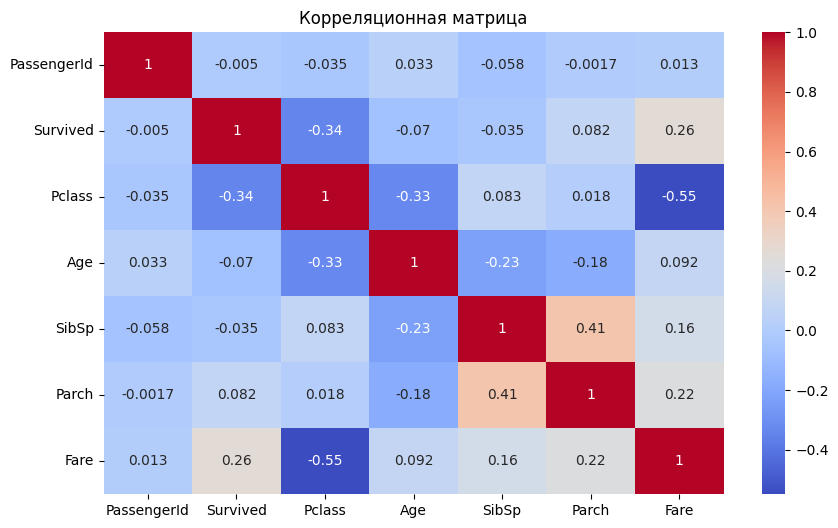

In [11]:
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Визуализация распределения возраста и выживаемости

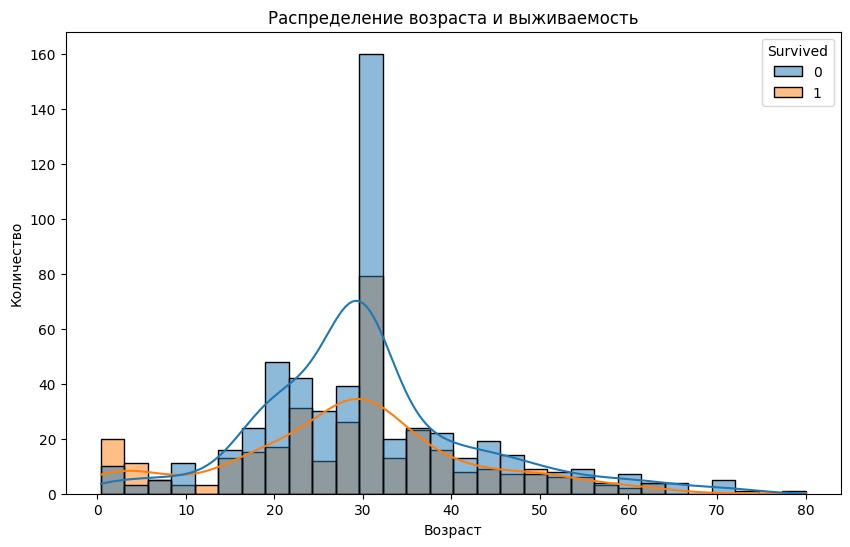

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Распределение возраста и выживаемость')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

### Корреляционная матрица

На тепловой карте представлены коэффициенты корреляции между числовыми признаками.
Можно отметить следующие моменты:
- Наибольшая отрицательная корреляция с целевой переменной `Survived` наблюдается у признака `Pclass`, что говорит о том, что пассажиры первого класса выживали чаще.
- Признаки `SibSp` и `Parch` (количество родственников) имеют слабую положительную корреляцию с `Survived`, что может свидетельствовать о более высоких шансах выживания при путешествии с семьёй.

### Распределение возраста и выживаемость

Гистограмма демонстрирует, что:
- Молодые пассажиры (в частности дети) имели больше шансов выжить, особенно в возрастной группе до 10 лет.
- Среди пожилых людей выживаемость ниже, хотя общее число таких пассажиров небольшое.

# 4. Преобразование категориальных признаков

In [13]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True,False,True


Категориальные признаки такие как:  ```Sex ``` , ```Embarked``` и ```Pclass``` были преобразованы в числовые значения с помощью  ```pd.get_dummies()```









In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Проверка после масштабирования
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,-0.502445,NaN,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,0.786845,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.420730,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",0.407926,0,0,373450,-0.486337,NaN,True,False,True,False,True


Для улучшения работы модели, числовые признаки, такие как  ```Age``` и  ```Fare``` , были стандартизированы с использованием ```StandardScaler```












In [16]:
data=data.drop(columns=['Name','Ticket','Cabin','PassengerId'])

# 5. Обучение моделей классификации

In [17]:
X=data.drop(columns='Survived')
y=data['Survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Для построения моделей классификации и оценки их производительности, данные были разделены на обучающую и тестовую выборки.

**DecisionTreeClassifier**

Для классификации использовалась модель дерева решений. Модель была обучена на обучающей выборке и оценена на тестовой.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , precision_score, recall_score, accuracy_score

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)

print("DecisionTreeClassifier:\n", classification_report(y_test, dtc_pred))

print("Accuracy:", accuracy_score(y_test, dtc_pred))
print("Precision (1):", precision_score(y_test, dtc_pred))
print("Recall (1):", recall_score(y_test, dtc_pred))


DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Accuracy: 0.7653631284916201
Precision (1): 0.7105263157894737
Recall (1): 0.7297297297297297


**RandomForestClassifier**

Для улучшения качества предсказаний была использована модель случайного леса. Кроме того, был проведен подбор гиперпараметров с помощью ```GridSearchCV```
для нахождения наилучших параметров модели.


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # Можно поменять на 'f1', 'precision', 'recall'
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rfc = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

rfc_pred_best = best_rfc.predict(X_test)

print("RandomForestClassifier (после GridSearchCV):\n", classification_report(y_test, rfc_pred_best))

print("Accuracy:", accuracy_score(y_test, rfc_pred_best))
print("Precision (1):", precision_score(y_test, rfc_pred_best))
print("Recall (1):", recall_score(y_test, rfc_pred_best))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier (после GridSearchCV):
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Accuracy: 0.8156424581005587
Precision (1): 0.8360655737704918
Recall (1): 0.6891891891891891


**LogisticRegression**

Также была обучена модель логистической регрессии для предсказания выживаемости пассажиров

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("LogisticRegression:\n", classification_report(y_test, lr_pred))


print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision (0):", precision_score(y_test, lr_pred, pos_label=0))
print("Recall (0):", recall_score(y_test, lr_pred, pos_label=0))

LogisticRegression:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.8044692737430168
Precision (0): 0.8125
Recall (0): 0.8666666666666667


**LinearRegression**

Для задачи регрессии была построена модель для предсказания возраста пассажиров. В качестве признаков использовались все столбцы, кроме ```Age```.



In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_reg = data.drop('Age', axis=1)
y_reg = data['Age']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lr_reg.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"Root Mean Squared Error (RMSE) для возраста: {rmse}")

Root Mean Squared Error (RMSE) для возраста: 0.8728534565941506


# 6. Итоги

**Классификация пассажиров (признак `Survived`):**

1. Проведен первичный анализ данных, устранены пропущенные значения и нерелевантные признаки.
2. Произведена трансформация категориальных признаков и масштабирование числовых переменных.
3. Обучены три модели:
    - DecisionTreeClassifier
    - RandomForestClassifier (в том числе с подбором гиперпараметров)
    - LogisticRegression
4. Наилучший результат показала модель RandomForestClassifier после подбора параметров:
    - **Accuracy:** 0.82
    - **Precision (выжившие):** 0.84
    - **Recall (выжившие):** 0.69
5. Модель LogisticRegression продемонстрировала хорошие значения precision и recall для класса погибших.

Сравнение с результатами семинара показывает, что были достигнуты лучшие значения по accuracy и precision.

---

**Регрессия (предсказание возраста):**

1. Построена модель LinearRegression для предсказания возраста пассажиров.
2. В качестве признаков использовались данные без признака `Age`.
3. После масштабирования признаков достигнута метрика:
    - **Root Mean Squared Error (RMSE):** 0.87

Это значение значительно ниже, чем RMSE = 10.7, полученное на семинаре.

---

**Выводы:**

- В процессе выполнена полная цепочка подготовки данных: от очистки и анализа до построения и оценки моделей.
- Улучшены ключевые метрики классификации и регрессии.
